<a href="https://colab.research.google.com/github/daniel-molina23/NEWSAPI-NLPModel/blob/main/HW5_4650_NewestONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# !pip install spacy

In [6]:
# !pip install newsapi-python

In [7]:
# !python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.3MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=d9a160e5bed128300d2558f19f6b708fc269b7cb11295c9c3db3c78f09ac9058
  Stored in directory: /tmp/pip-ephem-wheel-cache-5e3lpcth/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [8]:
import spacy
import en_core_web_lg
from newsapi import NewsApiClient

nlp_eng = en_core_web_lg.load()

newsapi = NewsApiClient(api_key='ac0c8e86daca4091ad5b5659fdb1d329')

In [10]:
articleArr = []
for pageNumber in range(1,6): # 1-5 inclusive
  temp = newsapi.get_everything(q='coronavirus', language='en',from_param='2021-02-26',to='2021-03-25', sort_by='relevancy',page=pageNumber)
  articleArr.append(temp)
  print('len of temp: ', len(temp))
print(len(articleArr))
# display(articleArr[0])

len of temp:  3
len of temp:  3
len of temp:  3
len of temp:  3
len of temp:  3
5


In [11]:
import pickle

filename = 'articlesCOVID.pckl'
pickle.dump(articleArr, open(filename,'wb')) # write binary

In [12]:
dados = []
for page, article in enumerate(articleArr):
  for x in article['articles']:
    title = x['title']
    date = x['publishedAt']
    description = x['description']
    content = x['content']
    dados.append({'title':title, 'date':date, 'desc':description, 'content':content})

import pandas as pd
df = pd.DataFrame(dados)
df = df.dropna()
display(df.content.head())
print(len(df))

0    But medical ethicists say the list is misleadi...
1    Similar laborious efforts may have to be scale...
2    What do you think the next few months look lik...
3    Why havent I seen Wayne Knight in the ads for ...
4    How is the Green Passport system working, for ...
Name: content, dtype: object

81


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [32]:
from string import punctuation
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from spacy.tokens import Doc

def get_keywords_eng(text):
  """
  Receives text and will handle with the spacy model to identify the Part-of-speech
  tagging that match with the keywords of our news.
  We will extract VERB, NOUN and PROPN (proper nouns): NNP, NNPS, NN, NNS, VB, VBD, VBG, VBN, VBP, VBZ
  """
  # token = word_tokenize(text)
  result = []
  # Make the spaCy doc obj for the sentence

  doc = nlp_eng(text)
  selected_word_type = set(["VERB", "NOUN", "PROPN"])
  # get words (tokens) for the sentence
  for t in doc:
    if(t.text in nlp_eng.Defaults.stop_words or t.text in punctuation or t.text == '\r\n'):
      continue
    elif(t.pos_ in selected_word_type):
        result.append(t.text)
  # end for
  return result

In [33]:
from collections import Counter
res = []
for content in df.content.values:
  res.append([(x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

# for content in df.content.values:
#   nltkText = nltk.Text(content)
#   wsj = nltkText.tagged_words(tag_set='universal')
#   word_tag_fd = nltk.FreqDist(wsj)
#   print(word_tag_fd)

print(res)
df['keywords'] = res # this is the new column
print(len(df))
print(len(df.columns))
display(df.head())

[['ethicists', 'list', 'suggests', 'risks', 'conditions'], ['efforts', 'scaled', 'country', 'strives', 'herd'], ['going', 'think', 'months', 'look', 'U.S.'], ['Knight', 'seen', 'Wayne', 'ads', 'Space'], ['Green', 'Passport', 'system', 'working', 'example'], ['pandemic', 'readers', 'year', 'Times', 'collected'], ['Artists', 'institutions', 'struggling', 'year', 'turmoil'], ['health', 'Community', 'centers', 'Abby', 'said'], ['said', 'turns', 'company', 'presenting', 'data'], ['know', 'blip', 'resume', 'progress', 'plateau'], ['city', 'inquiries', 'law', 'enforcements', 'handling'], ['summer', 'areas', 'country', 'dealing', 'surge'], ['China', 'amounts', 'relations', 'coup', 'solution'], ['Jean', 'MackenzieEurope', 'correspondent', 'BBC', 'News'], ['December', 'President', 'elect', 'Joe', 'Biden'], ['spokeswoman', 'House', 'transportation', 'committee', 'said'], ['March', 'a.m.', 'ET', 'LiveUpdated', 'experts'], ['government', 'image', 'captionAnti', 'anger', 'exploded'], ['University', 

,title,date,desc,content,keywords
0,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...,"[ethicists, list, suggests, risks, conditions]"
1,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...,"[efforts, scaled, country, strives, herd]"
2,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...,"[going, think, months, look, U.S.]"
3,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...,"[Knight, seen, Wayne, ads, Space]"
4,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ...","[Green, Passport, system, working, example]"


In [36]:
filename = 'articlesCOVID.pckl'
pickle.dump(df, open(filename,'wb')) # write binary
# df.to_csv(r'acticlesCOVID.csv', header=True,index=True)

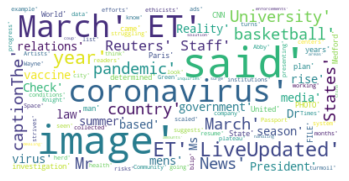

In [35]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = str(res)
wordcloud = WordCloud(max_font_size = 50, max_words=100,background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()